In [1]:
import wandb
import sys
import matplotlib.pyplot as plt
import scprep
import pandas as pd
sys.path.append('../src/')
from evaluate import get_results
from omegaconf import OmegaConf
from main import load_data
from model import AEDist
import numpy as np
import os
import glob
import torch

In [2]:
# Initialize wandb (replace 'your_entity' and 'your_project' with your specific details)
wandb.login()
api = wandb.Api()

# Specify your entity, project, and sweep ID
entity = "xingzhis"
project = "dmae"
sweep_id = '9qr8zqxg'

# Fetch the sweep
sweep = api.sweep(f"{entity}/{project}/{sweep_id}")

run_ids = [run.id for run in sweep.runs]

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


wandb: Currently logged in as: xingzhis. Use `wandb login --relogin` to force relogin


In [3]:
run_id = 'guesg5ug'

In [4]:
run = [run for run in sweep.runs if run.id == run_id][0]

In [5]:
cfg = OmegaConf.create(run.config)
folder_path = "../src/wandb/"
folder_list = glob.glob(f"{folder_path}*{run.id}*")
ckpt_files = glob.glob(f"{folder_list[0]}/files/*.ckpt")
ckpt_path = ckpt_files[0]
data_path = os.path.join(cfg.data.root, cfg.data.name + cfg.data.filetype)
data = np.load(data_path, allow_pickle=True)
# model = AEDist(dim=50, emb_dim=10)
# model.load_from_checkpoint(ckpt_path)
model = AEDist.load_from_checkpoint(ckpt_path)
model.eval()
x_all = torch.tensor(data['data'], dtype=torch.float32)
x_pred, z_pred = model(x_all)
x_pred = x_pred.detach().cpu().numpy()
z_pred = z_pred.detach().cpu().numpy()

/gpfs/gibbs/pi/krishnaswamy_smita/xingzhi/dmae/notebooks/../src/model.py:281: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.register_buffer('mean', torch.tensor(mean, dtype=torch.float32), persistent=True)
/gpfs/gibbs/pi/krishnaswamy_smita/xingzhi/dmae/notebooks/../src/model.py:282: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.register_buffer('std', torch.tensor(std, dtype=torch.float32), persistent=True)
/gpfs/gibbs/pi/krishnaswamy_smita/xingzhi/.conda_envs/geosink/lib/python3.11/site-packages/pytorch_lightning/utilities/parsing.py:269: UserWarning: Attribute 'activation_fn' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore t

In [26]:
data['data'].std(axis=0)

array([4.468392 , 3.1538465, 3.0930054, 2.606476 , 2.2410107, 2.0840688,
       2.0193112, 1.9640949, 1.8363554, 1.6616888, 1.6372398, 1.5167388,
       1.4493947, 1.456292 , 1.3701165, 1.3931617, 1.3420734, 1.3349681,
       1.3400419, 1.2954962, 1.2963849, 1.2622087, 1.2297077, 1.2148585,
       1.1900402, 1.2101272, 1.1444442, 1.1793195, 1.1711264, 1.1567101,
       1.158813 , 1.099623 , 1.1406013, 1.0981373, 1.1017267, 1.0803983,
       1.1015712, 1.1123711, 1.0667218, 1.0849276, 1.0597322, 1.0604192,
       1.0603263, 1.0547901, 1.0538181, 1.0397699, 1.0267104, 1.0492128,
       1.0359986, 1.052083 ], dtype=float32)

In [6]:
np.savez('../dm_data/eb_all_new_2.npz', data=z_pred, train_mask=data['is_train'])

/gpfs/gibbs/pi/krishnaswamy_smita/xingzhi/.conda_envs/geosink/lib/python3.11/site-packages/scprep/plot/utils.py:104: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


<Axes: >

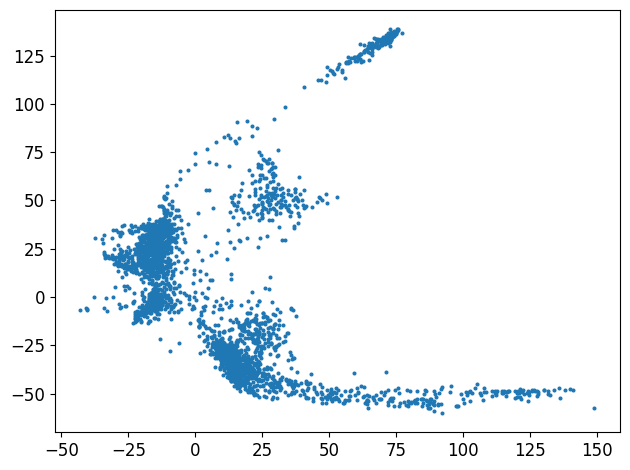

In [7]:
scprep.plot.scatter2d(z_pred)

In [24]:
data.files

['data', 'phate', 'dist', 'colors', 'is_train']

In [8]:
from scipy.spatial.distance import pdist, squareform

In [9]:
distpred = squareform(pdist(z_pred))

In [10]:
distpred

array([[  0.        ,  20.65798199,  14.5656034 , ..., 154.09384648,
         51.21053531,  39.49357124],
       [ 20.65798199,   0.        ,   9.29335489, ..., 174.73075278,
         64.46497518,  45.39127818],
       [ 14.5656034 ,   9.29335489,   0.        , ..., 167.297188  ,
         55.20120355,  36.93723003],
       ...,
       [154.09384648, 174.73075278, 167.297188  , ...,   0.        ,
        132.19930709, 155.46556419],
       [ 51.21053531,  64.46497518,  55.20120355, ..., 132.19930709,
          0.        ,  25.34241629],
       [ 39.49357124,  45.39127818,  36.93723003, ..., 155.46556419,
         25.34241629,   0.        ]])

In [11]:
disttrue = data['dist']

In [12]:
disttrue

array([[  0.        ,  21.74416441,  16.44515712, ..., 167.29463577,
         51.77108574,  45.93630163],
       [ 21.74416441,   0.        ,   8.83790674, ..., 175.44935572,
         61.64580542,  50.24308521],
       [ 16.44515712,   8.83790674,   0.        , ..., 172.58722743,
         54.33342824,  43.76308646],
       ...,
       [167.29463577, 175.44935572, 172.58722743, ...,   0.        ,
        141.00986269, 152.28448713],
       [ 51.77108574,  61.64580542,  54.33342824, ..., 141.00986269,
          0.        ,  19.20667245],
       [ 45.93630163,  50.24308521,  43.76308646, ..., 152.28448713,
         19.20667245,   0.        ]])

In [13]:
z_pred2 = model.encode(x_all)

In [14]:
z_pred2

tensor([[ 19.4105,  -8.1937],
        [ 11.3781, -27.2261],
        [  8.8937, -18.2710],
        ...,
        [ 72.4300, 136.4917],
        [-10.3917,  33.4518],
        [-16.2428,   8.7941]], grad_fn=<AddmmBackward0>)

In [15]:
z_pred

array([[ 19.410517,  -8.19369 ],
       [ 11.378137, -27.226112],
       [  8.893656, -18.271013],
       ...,
       [ 72.42999 , 136.49165 ],
       [-10.39174 ,  33.45177 ],
       [-16.242798,   8.79405 ]], dtype=float32)

In [16]:
model.std

tensor([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])

In [17]:
x_pred

array([[-1.4237069 ,  2.713687  ,  1.3737254 , ..., -0.170312  ,
         0.40118057, -0.7294757 ],
       [ 0.36857337,  0.55711913, -1.4227073 , ..., -0.10411127,
         0.13325569,  0.18062948],
       [-1.4373156 ,  2.103662  , -0.8020952 , ..., -0.26799658,
         0.07488039,  0.22522417],
       ...,
       [-4.7005467 , -0.74488235,  6.458291  , ..., -0.16435768,
        -0.15985134, -0.29649046],
       [-4.177622  , -0.49081928,  1.479496  , ..., -0.11627661,
         0.15541665, -0.03304047],
       [-2.2280898 , -1.8591666 , -1.2415369 , ...,  0.22712436,
        -0.2888154 ,  0.03665601]], dtype=float32)

/gpfs/gibbs/pi/krishnaswamy_smita/xingzhi/.conda_envs/geosink/lib/python3.11/site-packages/scprep/plot/utils.py:104: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


<Axes: >

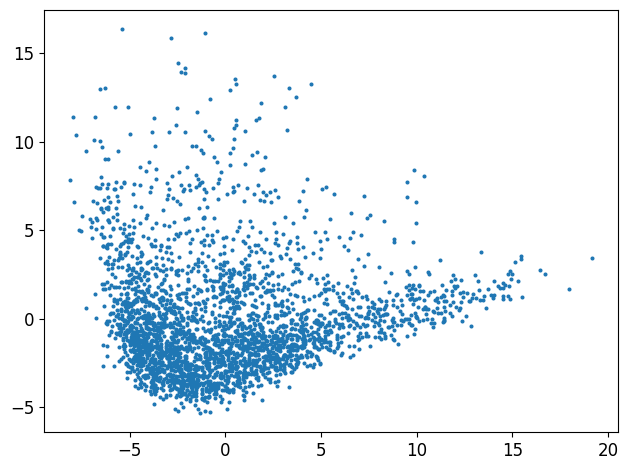

In [18]:
scprep.plot.scatter2d(data['data'])

/gpfs/gibbs/pi/krishnaswamy_smita/xingzhi/.conda_envs/geosink/lib/python3.11/site-packages/scprep/plot/utils.py:104: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


<Axes: >

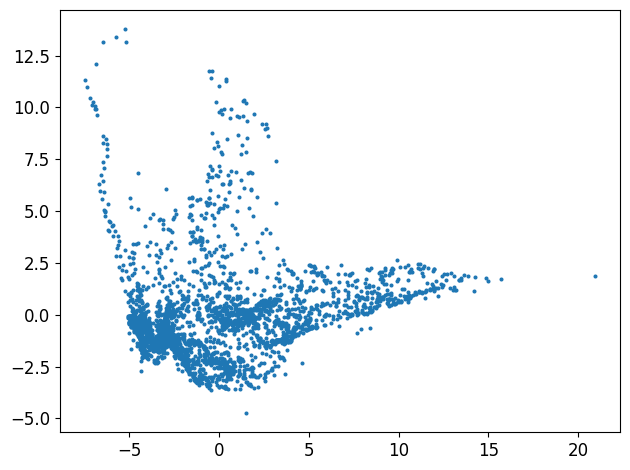

In [19]:
scprep.plot.scatter2d(x_pred)

In [20]:
trainloader, valloader, X, phate_coords, colors, dist, pp, mean, std = load_data(cfg, load_all=False)

In [21]:
X

array([[-0.21301298, -2.3534687 ,  0.5524443 , ...,  0.5493048 ,
         1.3934861 ,  0.17196587],
       [-1.3155088 , -1.1787565 , -0.9600033 , ...,  1.3089414 ,
        -0.77756536,  1.2356104 ],
       [-0.17299852, -3.7182226 , -1.9299909 , ...,  0.02395509,
        -0.8214241 , -0.23825574],
       ...,
       [-1.1791011 ,  5.685717  , -1.5876278 , ...,  2.584319  ,
        -0.2599245 ,  0.71141046],
       [-4.760755  , -1.411535  ,  4.5781436 , ..., -1.0765858 ,
        -0.09816735,  0.84981084],
       [-4.911862  , -0.62910384, -0.27711913, ..., -0.6270273 ,
        -1.4723185 , -0.5546906 ]], dtype=float32)

In [22]:
data['data']

array([[-1.7016331e+00,  8.8023923e-02,  2.0021570e+00, ...,
        -1.3836890e+00,  3.6277589e-01,  1.3107024e-01],
       [-2.1301298e-01, -2.3534687e+00,  5.5244428e-01, ...,
         5.4930478e-01,  1.3934861e+00,  1.7196587e-01],
       [-1.3155088e+00, -1.1787565e+00, -9.6000332e-01, ...,
         1.3089414e+00, -7.7756536e-01,  1.2356104e+00],
       ...,
       [-4.7607551e+00, -1.4115350e+00,  4.5781436e+00, ...,
        -1.0765858e+00, -9.8167352e-02,  8.4981084e-01],
       [-4.9118619e+00, -6.2910384e-01, -2.7711913e-01, ...,
        -6.2702727e-01, -1.4723185e+00, -5.5469060e-01],
       [-5.9857810e-01, -2.4779913e+00, -1.5524262e+00, ...,
         6.0734707e-01,  5.1273879e-02, -1.5904061e-03]], dtype=float32)

In [23]:
data['data'][data['is_train']]

array([[-0.21301298, -2.3534687 ,  0.5524443 , ...,  0.5493048 ,
         1.3934861 ,  0.17196587],
       [-1.3155088 , -1.1787565 , -0.9600033 , ...,  1.3089414 ,
        -0.77756536,  1.2356104 ],
       [-0.17299852, -3.7182226 , -1.9299909 , ...,  0.02395509,
        -0.8214241 , -0.23825574],
       ...,
       [-1.1791011 ,  5.685717  , -1.5876278 , ...,  2.584319  ,
        -0.2599245 ,  0.71141046],
       [-4.760755  , -1.411535  ,  4.5781436 , ..., -1.0765858 ,
        -0.09816735,  0.84981084],
       [-4.911862  , -0.62910384, -0.27711913, ..., -0.6270273 ,
        -1.4723185 , -0.5546906 ]], dtype=float32)